In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('seaborn')

CovidDF = pd.read_csv("covid_19_india.csv").drop(columns = 'Sno')
PoplDF = pd.read_csv("population_india_census2011.csv").sort_values(by=['State / Union Territory'])
PoplDF.set_index("State / Union Territory", inplace = True)
CovidData = CovidDF.groupby('State/UnionTerritory').sum()
PoplData = pd.DataFrame(PoplDF['Population'])
FinalData = pd.concat([CovidData, PoplData], axis=1, sort=True).dropna().rename_axis("State")
FinalData['IFR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Confirmed, axis = 1)
FinalData['CMR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Population, axis = 1)

FinalSELECT = FinalData.loc[['Delhi','Haryana','Uttar Pradesh']]

print(FinalSELECT.head())

                   Cured   Deaths  Confirmed   Population       IFR       CMR
State                                                                        
Delhi          1522493.0  81802.0  2710367.0   16787941.0  3.018115  0.487266
Haryana         265125.0   6243.0   435473.0   25351462.0  1.433614  0.024626
Uttar Pradesh   527907.0  24099.0   872302.0  199812341.0  2.762690  0.012061


           Date  State  TotalSamples Negative  Positive
645  2020-04-07  Delhi        9041.0     7308     576.0
646  2020-04-09  Delhi        9968.0     8643     720.0
647  2020-04-10  Delhi       11061.0     9662     903.0
648  2020-04-11  Delhi       11709.0    10218    1069.0
649  2020-04-12  Delhi       14036.0    11748    1154.0
           Date  State  TotalSamples Negative  Positive
662  2020-04-25  Delhi       35519.0    28693    2625.0
663  2020-04-26  Delhi       37613.0    31919    2918.0
664  2020-04-27  Delhi       39911.0    34145    3108.0
665  2020-04-28  Delhi       43370.0    36195    3314.0
666  2020-04-29  Delhi       47225.0    39920    3439.0


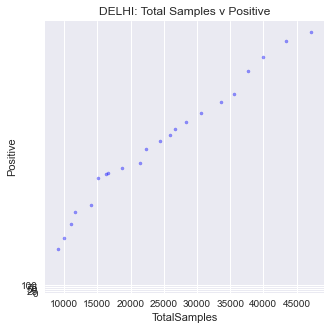

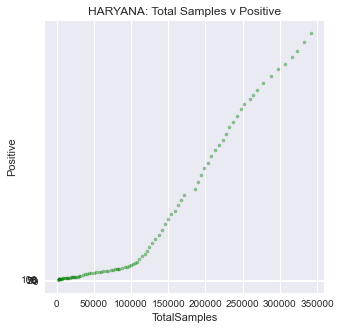

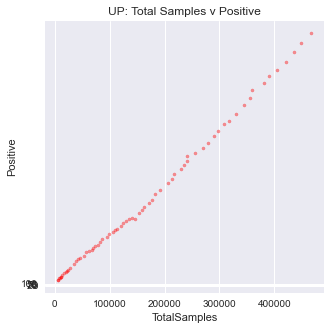

In [39]:
CovidTEST = pd.read_csv("StatewiseTestingDetails.csv")
CovidTestFILT = CovidTEST[['Date','State','TotalSamples','Negative', 'Positive']].dropna()
CovidTestDL = CovidTestFILT[CovidTestFILT['State']=='Delhi']
CovidTestHR = CovidTestFILT[CovidTestFILT['State']=='Haryana']
CovidTestUP = CovidTestFILT[CovidTestFILT['State']=='Uttar Pradesh']

plt.figure(figsize=(5,5))
plt.scatter(CovidTestDL['TotalSamples'], CovidTestDL['Positive'], s=10, c="b", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("DELHI: Total Samples v Positive")
plt.xlabel("TotalSamples")
plt.ylabel("Positive")

plt.figure(figsize=(5,5))
plt.scatter(CovidTestHR['TotalSamples'], CovidTestHR['Positive'], s=10, c="g", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("HARYANA: Total Samples v Positive")
plt.xlabel("TotalSamples")
plt.ylabel("Positive")

plt.figure(figsize=(5,5))
plt.scatter(CovidTestUP['TotalSamples'], CovidTestUP['Positive'], s=10, c="r", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("UP: Total Samples v Positive")
plt.xlabel("TotalSamples")
plt.ylabel("Positive")

print(CovidTestDL.head())
print(CovidTestDL.tail())

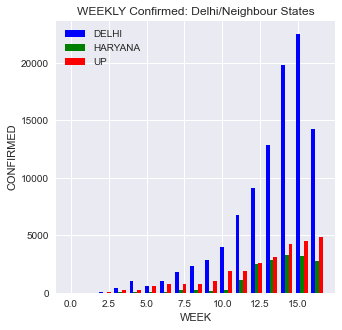

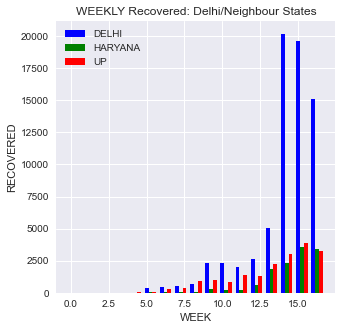

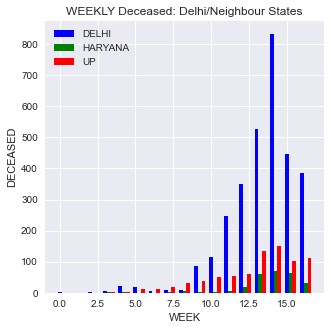

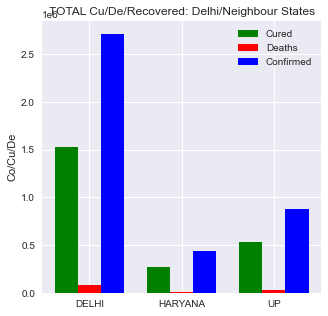

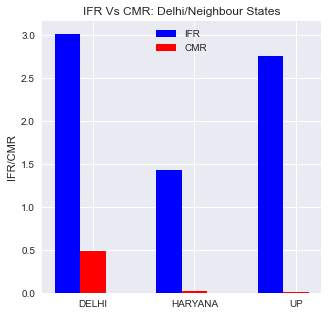

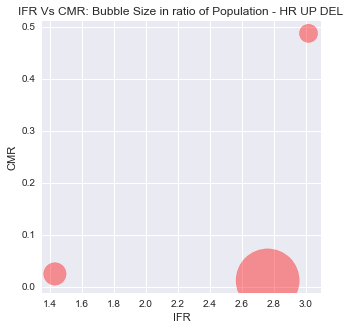

In [48]:
CovidALL = pd.read_csv("state_wise_daily.csv")
CovidDL = CovidALL[['Date','Status','DL','HR','UP']]

CovidDLConf = CovidDL[CovidDL['Status']=='Confirmed']
CovidDLReco = CovidDL[CovidDL['Status']=='Recovered']
CovidDLDece = CovidDL[CovidDL['Status']=='Deceased']

WEEK = [0]*len(CovidDLConf)
for x in range(0,len(CovidDLConf)):
    WEEK[x] = np.floor(abs(x-len(CovidDLConf))/7)

CovidDLConf.insert(0, "WEEK", WEEK, True) 
CovidDLReco.insert(0, "WEEK", WEEK, True) 
CovidDLDece.insert(0, "WEEK", WEEK, True) 

CovidDLConfWEEK = CovidDLConf.groupby('WEEK').sum().sort_index(axis = 0,ascending=False) 
CovidDLRecoWEEK = CovidDLReco.groupby('WEEK').sum().sort_index(axis = 0,ascending=False)  
CovidDLDeceWEEK = CovidDLDece.groupby('WEEK').sum().sort_index(axis = 0,ascending=False) 

barWidth = 0.25
r1 = np.arange(len(CovidDLConfWEEK))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLConfWEEK['DL'], color = 'b', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLConfWEEK['HR'], color = 'g', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLConfWEEK['UP'], color = 'r', width = 0.25, label = 'UP')
plt.title("WEEKLY Confirmed: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("CONFIRMED")
plt.legend()

plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLRecoWEEK['DL'], color = 'b', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLRecoWEEK['HR'], color = 'g', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLRecoWEEK['UP'], color = 'r', width = 0.25, label = 'UP')
plt.title("WEEKLY Recovered: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("RECOVERED")
plt.legend()

plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLDeceWEEK['DL'], color = 'b', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLDeceWEEK['HR'], color = 'g', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLDeceWEEK['UP'], color = 'r', width = 0.25, label = 'UP')
plt.title("WEEKLY Deceased: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("DECEASED")
plt.legend()

r11 = np.arange(len(FinalSELECT))
r22 = [x + barWidth for x in r11]
r33 = [x + barWidth for x in r22]

plt.figure(figsize=(5,5))
plt.bar(r11,FinalSELECT['Cured'], color = 'g', width = 0.25)
plt.bar(r22,FinalSELECT['Deaths'], color = 'r', width = 0.25)
plt.bar(r33,FinalSELECT['Confirmed'], color = 'b', width = 0.25)

plt.xticks([r + barWidth for r in range(len(FinalSELECT))], ['DELHI', 'HARYANA', 'UP'])
plt.title("TOTAL Cu/De/Recovered: Delhi/Neighbour States")
plt.ylabel("Co/Cu/De")
plt.legend(FinalSELECT)

plt.figure(figsize=(5,5))
plt.bar(r11,FinalSELECT['IFR'], color = 'b', width = 0.25, label = 'IFR')
plt.bar(r22,FinalSELECT['CMR'], color = 'r', width = 0.25, label = 'CMR')

plt.xticks([r + barWidth for r in range(len(FinalSELECT))], ['DELHI', 'HARYANA', 'UP'])
plt.title("IFR Vs CMR: Delhi/Neighbour States")
plt.ylabel("IFR/CMR")
plt.legend()

plt.figure(figsize=(5,5))
plt.scatter(FinalSELECT['IFR'], FinalSELECT['CMR'], s=FinalSELECT['Population']/50000, c="red", alpha=0.4)
plt.title("IFR Vs CMR: Bubble Size in ratio of Population - HR UP DEL ")

plt.xlabel("IFR")
plt.ylabel("CMR")

plt.show()